In [1]:
import pandas as pd
import psycopg2

In [2]:
import sqlite3

In [7]:
# List of Excel file names
excel_files = ['User.xlsx', 'Amenity.xlsx', 'BookingHistory.xlsx', 'BookingPromotion.xlsx', 'Booking.xlsx',
               'Cards.xlsx', 'Category.xlsx', 'CouponRedemption.xlsx', 'Coupon.xlsx', 'Customer.xlsx',
               'Discount.xlsx', 'Employee.xlsx', 'Location.xlsx', 'Owner.xlsx', 'PaymentMethod.xlsx',
               'Payment.xlsx', 'Promotion.xlsx', 'Property.xlsx', 'Review.xlsx', 'Wishlist.xlsx']

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Iterate over the list of Excel files
for file_name in excel_files:
    # Load Excel file into a pandas DataFrame
    df = pd.read_excel(file_name)
    # Store DataFrame in the dictionary with file name as key
    dfs[file_name] = df

In [8]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('DWHdb2.db')

In [9]:
# Create a cursor object
cur = conn.cursor()


In [10]:
# Iterate over the list of Excel files
for file_name in excel_files:
    # Load Excel file into a pandas DataFrame
    df = pd.read_excel(file_name)
    # Write DataFrame to SQLite table with the same name as the file (without extension)
    table_name = file_name.split('.')[0]  # Extract table name from file name
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    # Commit the changes and close the connection
conn.commit()

print("Data inserted into SQLite tables successfully!")

Data inserted into SQLite tables successfully!


In [11]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM Customer")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM Customer")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tCustomer': {row_count}")

(1, 'Ashley Reed', 'rodriguezrichard@example.net', '+1-542-902-3361x89403', 2910)
(2, 'Gregory Gonzalez', 'vjackson@example.com', '001-425-404-0291', 3610)
(3, None, 'cynthiamartin@example.net', '+1-474-890-0884x711', 4966)
(4, 'Mike Lynch', 'iacosta@example.net', '369-818-7980x9175', 230)
(5, 'Paul Rodriguez', 'justin31@example.org', '750.306.5933x44111', 1895)
(6, 'Bryce Morgan', 'brandon70@example.com', '907.200.7684x11325', 2056)
(7, 'Susan Mason', 'christopherjones@example.com', '(467)988-9531x034', 2935)
(8, None, 'weaverautumn@example.com', '(714)320-4933x953', 3454)
(9, 'William Chandler', 'juanharris@example.net', '+1-635-217-9234x02235', 4089)
(10, 'Tammy Jones', 'xjones@example.com', '229-638-1846x47349', 3671)
(11, 'Marcus Elliott', 'edwin99@example.net', '265-286-9088x77821', 893)
(12, 'Lindsey Obrien', 'brendaayers@example.com', '(427)230-8376', 3957)
(13, 'Janet Mcknight', 'qgallegos@example.com', '560-982-7156x9164', 3450)
(14, None, 'meghancox@example.com', '9115795912

In [12]:
create_table_query = """
CREATE TABLE IF NOT EXISTS CustomerDimension (
    CustomerID INTEGER PRIMARY KEY,
    Name TEXT,
    Email TEXT,
    PhoneNum TEXT,
    DateJoined TEXT,
    IsEmployee INTEGER,
    AccountNumber TEXT
);
"""

conn.execute(create_table_query)

insert_data_query = """
INSERT  INTO CustomerDimension (CustomerID, Name, Email, PhoneNum, DateJoined, IsEmployee, AccountNumber)
SELECT 
    c.CustomerID,
    c.Name,
    c.Email,
    c.PhoneNum,
    u.DateJoined,
    u.IsEmployee,
    p.AccountNumber
FROM Customer c
JOIN User u ON c.CustomerID = u.UserID
JOIN PaymentMethod p ON c.CustomerID = p.MethodID
WHERE c.CustomerID NOT IN (SELECT CustomerID FROM CustomerDimension);
"""

conn.execute(insert_data_query)

conn.commit()

print("CustomerDimension table created and populated successfully!")

CustomerDimension table created and populated successfully!


In [13]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM CustomerDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM CustomerDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tCustomerDimension': {row_count}")

(1, 'Ashley Reed', 'rodriguezrichard@example.net', '+1-542-902-3361x89403', '2019-12-23 00:00:00', 1, '3533637275273950')
(2, 'Gregory Gonzalez', 'vjackson@example.com', '001-425-404-0291', '2000-01-09 00:00:00', 0, '3549095103891745')
(3, None, 'cynthiamartin@example.net', '+1-474-890-0884x711', '2000-12-22 00:00:00', 1, '371802689402816')
(4, 'Mike Lynch', 'iacosta@example.net', '369-818-7980x9175', '2000-12-23 00:00:00', 0, '2586564290697559')
(5, 'Paul Rodriguez', 'justin31@example.org', '750.306.5933x44111', '2023-07-29 00:00:00', 1, '4844680070516845')
(6, 'Bryce Morgan', 'brandon70@example.com', '907.200.7684x11325', '2005-03-30 00:00:00', 0, '3596590667505451')
(7, 'Susan Mason', 'christopherjones@example.com', '(467)988-9531x034', '2016-03-20 00:00:00', 1, '6011615346936361')
(8, None, 'weaverautumn@example.com', '(714)320-4933x953', '2015-09-09 00:00:00', 0, '4337263499298735')
(9, 'William Chandler', 'juanharris@example.net', '+1-635-217-9234x02235', '2008-02-03 00:00:00', 0

In [14]:
# Define SQL query to create BookingDimension table
create_table_query = """
CREATE TABLE IF NOT EXISTS BookingDimension (
    BookingID INTEGER PRIMARY KEY,
    BookingType TEXT,
    Comment TEXT,
    RoomType TEXT,
    RoomSize TEXT,
    RoomFeatures TEXT
);
"""

# Execute SQL query to create BookingDimension table
conn.execute(create_table_query)

# Define SQL query to insert data into BookingDimension table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO BookingDimension (BookingID, BookingType, Comment, RoomType, RoomSize, RoomFeatures)
SELECT 
    b.BookingID,
    b.BookingType,
    r.Comment,
    c.RoomType,
    c.RoomSize,
    c.RoomFeatures
FROM Booking b
 JOIN Review r ON b.BookingID = r.BookingID
JOIN Category c ON b.BookingID = c.BookingID
WHERE b.BookingID NOT IN (SELECT BookingID FROM BookingDimension);
"""

# Execute SQL query to insert data into BookingDimension table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()

print("BookingDimension2 table created and populated successfully!")

BookingDimension2 table created and populated successfully!


In [15]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM BookingDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM BookingDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tBookingDimension': {row_count}")

(1, 'Group', 'Hope above success fight treatment soon.', 'Suite', 'Medium', 'Campaign east air focus tonight.')
(3, 'Group', 'Score do they thousand ahead.', 'Double', 'Large', 'News left audience specific size.')
(6, 'Group', 'Consider whose TV special back.', 'Single', 'Large', 'Performance beat sister.')
(8, 'Single', 'Market do include statement activity compare imagine.', 'Double', 'Large', 'Board live put ok father.')
(9, None, 'Perhaps deep project their dream support.', 'Single', 'Medium', 'Almost soon will foreign environment do traditional identify.')
(11, 'Group', 'Buy serve available bit most federal skin.', 'Double', 'Medium', 'True marriage teach push.')
(13, 'Single', 'Consumer safe difficult down now marriage organization.', 'Double', 'Large', 'Computer western allow ready road.')
(17, 'Group', 'Newspaper however care according collection Democrat child.', 'Suite', 'Small', 'Crime hold civil material dream.')
(18, 'Group', 'Different claim large coach trouble.', 'Double

In [16]:
# Define SQL query to create PropertyDimension table
create_table_query = """
CREATE TABLE IF NOT EXISTS PropertyDimension (
    PropertyID INTEGER PRIMARY KEY,
    PropertyName TEXT,
    PropertyType TEXT,
    PropertyDesc TEXT,
    AmenityName TEXT,
    AmenityDetails TEXT
);
"""

# Execute SQL query to create PropertyDimension table
conn.execute(create_table_query)

# Define SQL query to insert data into PropertyDimension table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO PropertyDimension (PropertyID, PropertyName, PropertyType, PropertyDesc, AmenityName, AmenityDetails)
SELECT 
    p.PropertyID,
    p.Name,
    p.Type,
    p.PropertyDesc,
    a.Name,
    a.Details
FROM Property p
LEFT JOIN Amenity a ON p.PropertyID = a.PropertyID
WHERE p.PropertyID NOT IN (SELECT PropertyID FROM PropertyDimension);
"""

# Execute SQL query to insert data into PropertyDimension table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()


print("PropertyDimension table created and populated successfully!")

PropertyDimension table created and populated successfully!


In [17]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM PropertyDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM PropertyDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tPropertyDimension': {row_count}")

(1, 'Condo Jennings Street', 'Residential', 'Key smile increase really meeting article growth strategy expect anything green explain.', 'Parking', 'Pay growth share send show war.')
(2, 'House Cory Cliffs', 'Commercial', 'Hospital special company note try poor the product kind next.', 'Gym', 'Business themselves world quickly upon space personal.')
(3, 'Cottage Jasmine Forest', 'Residential', 'Federal statement someone or executive whether appear break onto attack poor strategy half.', 'Gym', 'Goal discussion imagine factor newspaper.')
(4, None, 'Commercial', 'Sport field one close quality interesting report know why from growth task task.', 'Gym', 'Century wide shake eye.')
(5, 'Condo Amber Knoll', 'Commercial', 'Commercial camera store would important color sport argue small land others change.', 'Gym', 'Successful road cost.')
(6, 'House Brady Extensions', 'Residential', 'Government rock send price perhaps rate accept because watch allow.', 'Spa', 'Kitchen heart affect individual t

In [18]:
# Define SQL query to create LocationDimension table
create_table_query = """
CREATE TABLE IF NOT EXISTS LocationDimension (
    LocationID INTEGER PRIMARY KEY,
    City TEXT,
    State TEXT,
    Country TEXT,
    Zip TEXT
);
"""

# Execute SQL query to create LocationDimension table
conn.execute(create_table_query)

# Define SQL query to insert data into LocationDimension table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO LocationDimension (LocationID, City, State, Country, Zip)
SELECT 
    l.LocationID,
    p.City,
    p.State,
    l.Country,
    p.Zip
FROM Location l
JOIN Property p ON l.LocationID = p.CountryID
WHERE LocationID NOT IN (SELECT LocationID FROM LocationDimension);
"""

# Execute SQL query to insert data into LocationDimension table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()

print("LocationDimension table created and populated successfully!")

LocationDimension table created and populated successfully!


In [19]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM LocationDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM LocationDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tLocationDimension': {row_count}")

(1, 'Port Annatown', 'South Dakota', 'Netherlands Antilles', '38270')
(2, 'East Sierra', 'Maine', 'Central African Republic', '24051')
(3, 'East Mitchellport', 'Wisconsin', 'Syrian Arab Republic', '10962')
(4, 'Lake April', 'Connecticut', 'Gibraltar', '84798')
(5, 'North Thomasborough', 'Louisiana', 'Heard Island and McDonald Islands', '24954')
(6, 'Hernandezview', 'Hawaii', 'Belize', '64106')
(7, 'Robinview', 'Hawaii', 'Nepal', '97737')
(8, 'Dannymouth', 'Alaska', 'Honduras', '41266')
(9, 'East Teresaland', 'Ohio', 'Puerto Rico', '34078')
(10, 'Port Shane', 'Washington', 'Paraguay', '67815')
(11, 'Austinshire', 'Montana', 'Norway', '6190')
(12, 'New Kimberlyburgh', 'Texas', 'Latvia', '7098')
(13, 'Lake Katherine', 'New Hampshire', 'Uruguay', '14138')
(14, 'Jodyfort', 'Minnesota', 'Bulgaria', '48963')
(15, 'Charlesborough', 'Idaho', 'Antarctica (the territory South of 60 deg S)', '39202')
(16, 'Harrisonstad', 'Alabama', 'Cocos (Keeling) Islands', '27479')
(17, 'Lake Kevin', 'Washington

In [20]:
# Define SQL query to create PromotionDimension table
create_table_query = """
CREATE TABLE IF NOT EXISTS PromotionDimension (
    PromotionID INTEGER PRIMARY KEY,
    PromotionName TEXT,
    PromotionDescription TEXT,
    StartDate TEXT,
    EndDate TEXT,
    CouponCode TEXT
);
"""

# Execute SQL query to create PromotionDimension table
conn.execute(create_table_query)

# Define SQL query to insert data into PromotionDimension table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO PromotionDimension (PromotionID, PromotionName, PromotionDescription, StartDate, EndDate, CouponCode)
SELECT 
    p.PromotionID,
    p.PromotionName,
    p.Description,
    p.StartDate,
    p.EndDate,
    c.CouponCode
FROM Promotion p
LEFT JOIN Coupon c ON p.PromotionID = c.PromotionID;
"""

# Execute SQL query to insert data into PromotionDimension table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()


print("PromotionDimension table created and populated successfully!")

PromotionDimension table created and populated successfully!


In [21]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM PromotionDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM PromotionDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tPromotionDimension': {row_count}")

(1, 'Up-sized radical algorithm', 'Many city big evening.', '2022-11-14 00:00:00', '2023-06-04 00:00:00', '542dfb36-5b91-4aa5-be85-9bdd39ebde0c')
(2, 'Configurable 4thgeneration moderator', 'Difference modern week.', '2023-01-31 00:00:00', '2023-05-17 00:00:00', '0b3d1a87-4ec9-46a3-93f2-dc0fffa75a20')
(3, 'Monitored zero-defect neural-net', 'Dog sound policy.', '2022-09-29 00:00:00', '2021-01-11 00:00:00', '877e458a-1e57-4d57-8230-0a1be359343c')
(4, 'Extended zero-defect capability', 'Leader concern color claim long color high.', '2022-01-29 00:00:00', '2020-08-10 00:00:00', '6f911713-e4b9-4636-9880-b26b0ccd0b1e')
(5, 'Mandatory well-modulated attitude', 'Must personal impact involve himself design range specific.', '2020-11-10 00:00:00', '2023-05-05 00:00:00', None)
(6, 'User-friendly value-added functionalities', 'Create man foot.', '2023-08-17 00:00:00', '2023-06-13 00:00:00', None)
(7, 'Programmable tertiary capacity', 'Poor summer board make.', '2022-01-16 00:00:00', '2022-03-15 0

In [22]:
# Define SQL query to create PaymentDimension table
create_table_query = """
CREATE TABLE IF NOT EXISTS PaymentDimension (
    PaymentID INTEGER PRIMARY KEY,
    PaymentDate TEXT,
    MethodName TEXT,
    CardName TEXT,
    CardCompany TEXT
);
"""

# Execute SQL query to create PaymentDimension table
conn.execute(create_table_query)

# Define SQL query to insert data into PaymentDimension table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO PaymentDimension (PaymentID, PaymentDate, MethodName, CardName, CardCompany)
SELECT 
    p.PaymentID,
    p.PaymentDate,
    pm.MethodName,
    c.CardName,
    c.CardComp
FROM Payment p
LEFT JOIN PaymentMethod pm ON p.PaymentID = pm.MethodID
LEFT JOIN Cards c ON p.PaymentID = c.PaymentID;
"""

# Execute SQL query to insert data into PaymentDimension table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()


print("PaymentDimension table created and populated successfully!")

PaymentDimension table created and populated successfully!


In [23]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to select data from a table
cursor.execute("SELECT * FROM PaymentDimension")  # Replace 'your_table_name' with the name of your table

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print each row
for row in rows:
    print(row)

    cursor.execute(f"SELECT COUNT(*) FROM PaymentDimension")

    # Fetch the result
row_count = cursor.fetchone()[0]

# Print the number of rows
print(f"Number of rows in 'tPaymentDimension': {row_count}")

(1, '2024-03-24 00:00:00', 'Google Pay', 'Abigail Davis', 'American Express')
(2, '2024-05-01 00:00:00', 'Debit Card', 'Brandon Morgan', 'MasterCard')
(3, '2024-04-26 00:00:00', None, 'Alejandro Freeman', 'MasterCard')
(4, '2024-02-13 00:00:00', 'PayPal', 'Brett Johnson', 'Visa')
(5, '2024-01-14 00:00:00', 'Apple Pay', 'Alexandria Mitchell DDS', 'American Express')
(6, '2024-01-02 00:00:00', 'Apple Pay', 'Alexander Shelton', 'Visa')
(7, '2024-05-07 00:00:00', 'Bank Transfer', 'Andrew Wade', 'American Express')
(8, '2024-04-16 00:00:00', 'Google Pay', 'April Pugh', 'MasterCard')
(9, '2024-05-04 00:00:00', 'Credit Card', 'Aaron Conley', 'American Express')
(10, '2024-05-18 00:00:00', 'Credit Card', 'Donald Avila DDS', 'American Express')
(11, '2024-04-07 00:00:00', 'PayPal', 'Benjamin Lyons', 'American Express')
(12, '2024-01-21 00:00:00', 'PayPal', 'Carlos Becker', 'American Express')
(13, '2024-01-03 00:00:00', 'PayPal', 'Chelsea Cummings', 'Visa')
(14, '2024-04-21 00:00:00', 'Apple Pa

In [24]:
# Define SQL query to create the fact table
create_table_query = """
CREATE TABLE IF NOT EXISTS FactTable (
    CustomerID INTEGER,
    BookingID INTEGER,
    PropertyID INTEGER,
    LocationID INTEGER,
    PromotionID INTEGER,
    PaymentID INTEGER,
    GuestCount INTEGER,
    Rating INTEGER,
    Price REAL,
    DiscountPercentage REAL,
    Amount REAL,
    PRIMARY KEY (CustomerID, BookingID, PropertyID, LocationID, PromotionID, PaymentID),
    FOREIGN KEY (CustomerID) REFERENCES CustomerDimension(CustomerID),
    FOREIGN KEY (BookingID) REFERENCES BookingDimension(BookingID),
    FOREIGN KEY (PropertyID) REFERENCES PropertyDimension(PropertyID),
    FOREIGN KEY (LocationID) REFERENCES LocationDimension(LocationID),
    FOREIGN KEY (PromotionID) REFERENCES PromotionDimension(PromotionID),
    FOREIGN KEY (PaymentID) REFERENCES PaymentDimension(PaymentID)
);
"""

# Execute SQL query to create the fact table
conn.execute(create_table_query)

# # Define SQL query to insert data into the fact table by joining attributes
insert_data_query = """
INSERT OR IGNORE INTO FactTable 
            (CustomerID, BookingID, PropertyID, LocationID, PromotionID, PaymentID)
            SELECT 
                CD.CustomerID, BD.BookingID, PD.PropertyID, LD.LocationID, PrD.PromotionID, PyD.PaymentID
            FROM 
                Booking B
            INNER JOIN CustomerDimension AS CD ON B.CustomerID = CD.CustomerID
            INNER JOIN BookingDimension AS BD ON B.BookingID = BD.BookingID
            INNER JOIN PropertyDimension AS PD ON B.PropertyID = PD.PropertyID
            INNER JOIN LocationDimension AS LD ON B.LocationID = LD.LocationID
            INNER JOIN PromotionDimension AS PrD ON B.PromotionID = PrD.PromotionID
            INNER JOIN PaymentDimension AS PyD ON B.PaymentID = PyD.PaymentID;
"""

# Execute SQL query to insert data into the fact table
conn.execute(insert_data_query)

# Commit the transaction
conn.commit()

print("FactTable created and populated successfully!")

FactTable created and populated successfully!


In [25]:
# Define SQL query to update the fact table and populate the GuestCount column
update_table_query = """
UPDATE FactTable
SET GuestCount = (
    SELECT B.GuestCount
    FROM Booking B
    WHERE FactTable.CustomerID = B.CustomerID
      AND FactTable.BookingID = B.BookingID
      AND FactTable.PropertyID = B.PropertyID
      AND FactTable.LocationID = B.LocationID
      AND FactTable.PromotionID = B.PromotionID
      AND FactTable.PaymentID = B.PaymentID
);
"""

# Execute SQL query to update the fact table
conn.execute(update_table_query)

# Commit the transaction
conn.commit()

print("FactTable updated with GuestCount successfully!")

FactTable updated with GuestCount successfully!


In [26]:
update_table_query = """
UPDATE FactTable
SET Rating = (
    SELECT R.Rating
    FROM Review R
    WHERE FactTable.BookingID = R.BookingID
);
"""

# Execute SQL query to update the fact table
conn.execute(update_table_query)

# Commit the transaction
conn.commit()

print("FactTable updated with Rating successfully!")

FactTable updated with Rating successfully!


In [27]:
update_table_query = """
UPDATE FactTable
SET Price = (
    SELECT P.Price
    FROM Property P
    WHERE FactTable.PropertyID = P.PropertyID
);
"""

# Execute SQL query to update the fact table
conn.execute(update_table_query)

# Commit the transaction
conn.commit()

print("FactTable updated with Price successfully!")

FactTable updated with Price successfully!


In [28]:
update_table_query = """
UPDATE FactTable
SET DiscountPercentage = (
    SELECT PrD.DiscountPercentage
    FROM Promotion PrD
    WHERE FactTable.PromotionID = PrD.PromotionID
);
"""

# Execute SQL query to update the fact table
conn.execute(update_table_query)

# Commit the transaction
conn.commit()

print("FactTable updated with DiscountPercentage successfully!")

FactTable updated with DiscountPercentage successfully!


In [29]:
update_table_query = """
UPDATE FactTable
SET Amount = (
    SELECT PyD.Amount
    FROM Payment PyD
    WHERE FactTable.PaymentID = PyD.PaymentID
);
"""

# Execute SQL query to update the fact table
conn.execute(update_table_query)

# Commit the transaction
conn.commit()

print("FactTable updated with AmountPaid successfully!")

FactTable updated with AmountPaid successfully!


In [30]:

# Define a function to load data from a table into a DataFrame
def load_table_into_df(table_name):
    # SQL query to select all data from the table
    query = f"SELECT * FROM {table_name};"
    # Use pandas to read SQL query results into a DataFrame
    df = pd.read_sql_query(query, conn)
    return df

# List of dimension tables
dimension_tables = ['CustomerDimension', 'BookingDimension', 'PropertyDimension', 'LocationDimension',  'PromotionDimension', 'PaymentDimension']

# Dictionary to store DataFrames
dimension_dfs = {}

# Load data from each dimension table into a DataFrame
for table in dimension_tables:
    dimension_dfs[table] = load_table_into_df(table)



# Access DataFrames using table names
print(dimension_dfs['CustomerDimension'])
print(dimension_dfs['BookingDimension'])
print(dimension_dfs['PropertyDimension'])
print(dimension_dfs['LocationDimension'])
print(dimension_dfs['PromotionDimension'])
print(dimension_dfs['PaymentDimension'])




      CustomerID              Name                         Email  \
0              1       Ashley Reed  rodriguezrichard@example.net   
1              2  Gregory Gonzalez          vjackson@example.com   
2              3              None     cynthiamartin@example.net   
3              4        Mike Lynch           iacosta@example.net   
4              5    Paul Rodriguez          justin31@example.org   
...          ...               ...                           ...   
1495        1496    Lauren Rosales         bradgrant@example.net   
1496        1497     David Johnson            abrown@example.org   
1497        1498     Diane Whitney           jmelton@example.org   
1498        1499     Kathy Bennett            umccoy@example.net   
1499        1500    Brittany White     joanngriffith@example.net   

                   PhoneNum           DateJoined  IsEmployee     AccountNumber  
0     +1-542-902-3361x89403  2019-12-23 00:00:00           1  3533637275273950  
1          001-425-40

In [31]:
fact_table_query = "SELECT * FROM FactTable"
fact_df = pd.read_sql(fact_table_query, conn)

In [32]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import string
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


%matplotlib inline

In [33]:
print(dimension_dfs['CustomerDimension'].shape)
print(dimension_dfs['CustomerDimension'].columns)

(1500, 7)
Index(['CustomerID', 'Name', 'Email', 'PhoneNum', 'DateJoined', 'IsEmployee',
       'AccountNumber'],
      dtype='object')


In [34]:
dimension_dfs['CustomerDimension'].head(15)

,CustomerID,Name,Email,PhoneNum,DateJoined,IsEmployee,AccountNumber
0,1,Ashley Reed,rodriguezrichard@example.net,+1-542-902-3361x89403,2019-12-23 00:00:00,1,3533637275273950
1,2,Gregory Gonzalez,vjackson@example.com,001-425-404-0291,2000-01-09 00:00:00,0,3549095103891745
2,3,None,cynthiamartin@example.net,+1-474-890-0884x711,2000-12-22 00:00:00,1,371802689402816
3,4,Mike Lynch,iacosta@example.net,369-818-7980x9175,2000-12-23 00:00:00,0,2586564290697559
4,5,Paul Rodriguez,justin31@example.org,750.306.5933x44111,2023-07-29 00:00:00,1,4844680070516845
5,6,Bryce Morgan,brandon70@example.com,907.200.7684x11325,2005-03-30 00:00:00,0,3596590667505451
6,7,Susan Mason,christopherjones@example.com,(467)988-9531x034,2016-03-20 00:00:00,1,6011615346936361
7,8,None,weaverautumn@example.com,(714)320-4933x953,2015-09-09 00:00:00,0,4337263499298735
8,9,William Chandler,juanharris@example.net,+1-635-217-9234x02235,2008-02-03 00:00:00,0,4689838939662560260
9,10,Tammy Jones,xjones@example.com,229-638-1846x47349,2005-10-15 00:00:00,1,4549749102362409486


In [35]:
dimension_dfs['CustomerDimension'].dtypes

CustomerID        int64
Name             object
Email            object
PhoneNum         object
DateJoined       object
IsEmployee        int64
AccountNumber    object
dtype: object

In [36]:
def count(df):
    empty_strings = df.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(dimension_dfs['CustomerDimension'])

CustomerID       0
Name             0
Email            0
PhoneNum         0
DateJoined       0
IsEmployee       0
AccountNumber    0
dtype: int64

In [37]:
#The function returns a boolean value, checks if 0's are present in the column. It then replaces the 0's with null values and return TRUE
#If the column has no return values, the function returns FALSE.

def replacezeros(df, col_name):
    if df[df[col_name] == 0.0].shape[0] > 0:
        df[col_name] = df[col_name].replace(0, np.nan)
        return True
    else:
        return False

In [38]:
replacezeros(dimension_dfs['CustomerDimension'], 'AccountNumber')

False

MISSING VALUE HANDLING

In [39]:
dimension_dfs['CustomerDimension'].isna().sum()

CustomerID        0
Name             29
Email            14
PhoneNum          0
DateJoined        0
IsEmployee        0
AccountNumber     0
dtype: int64

<Axes: >

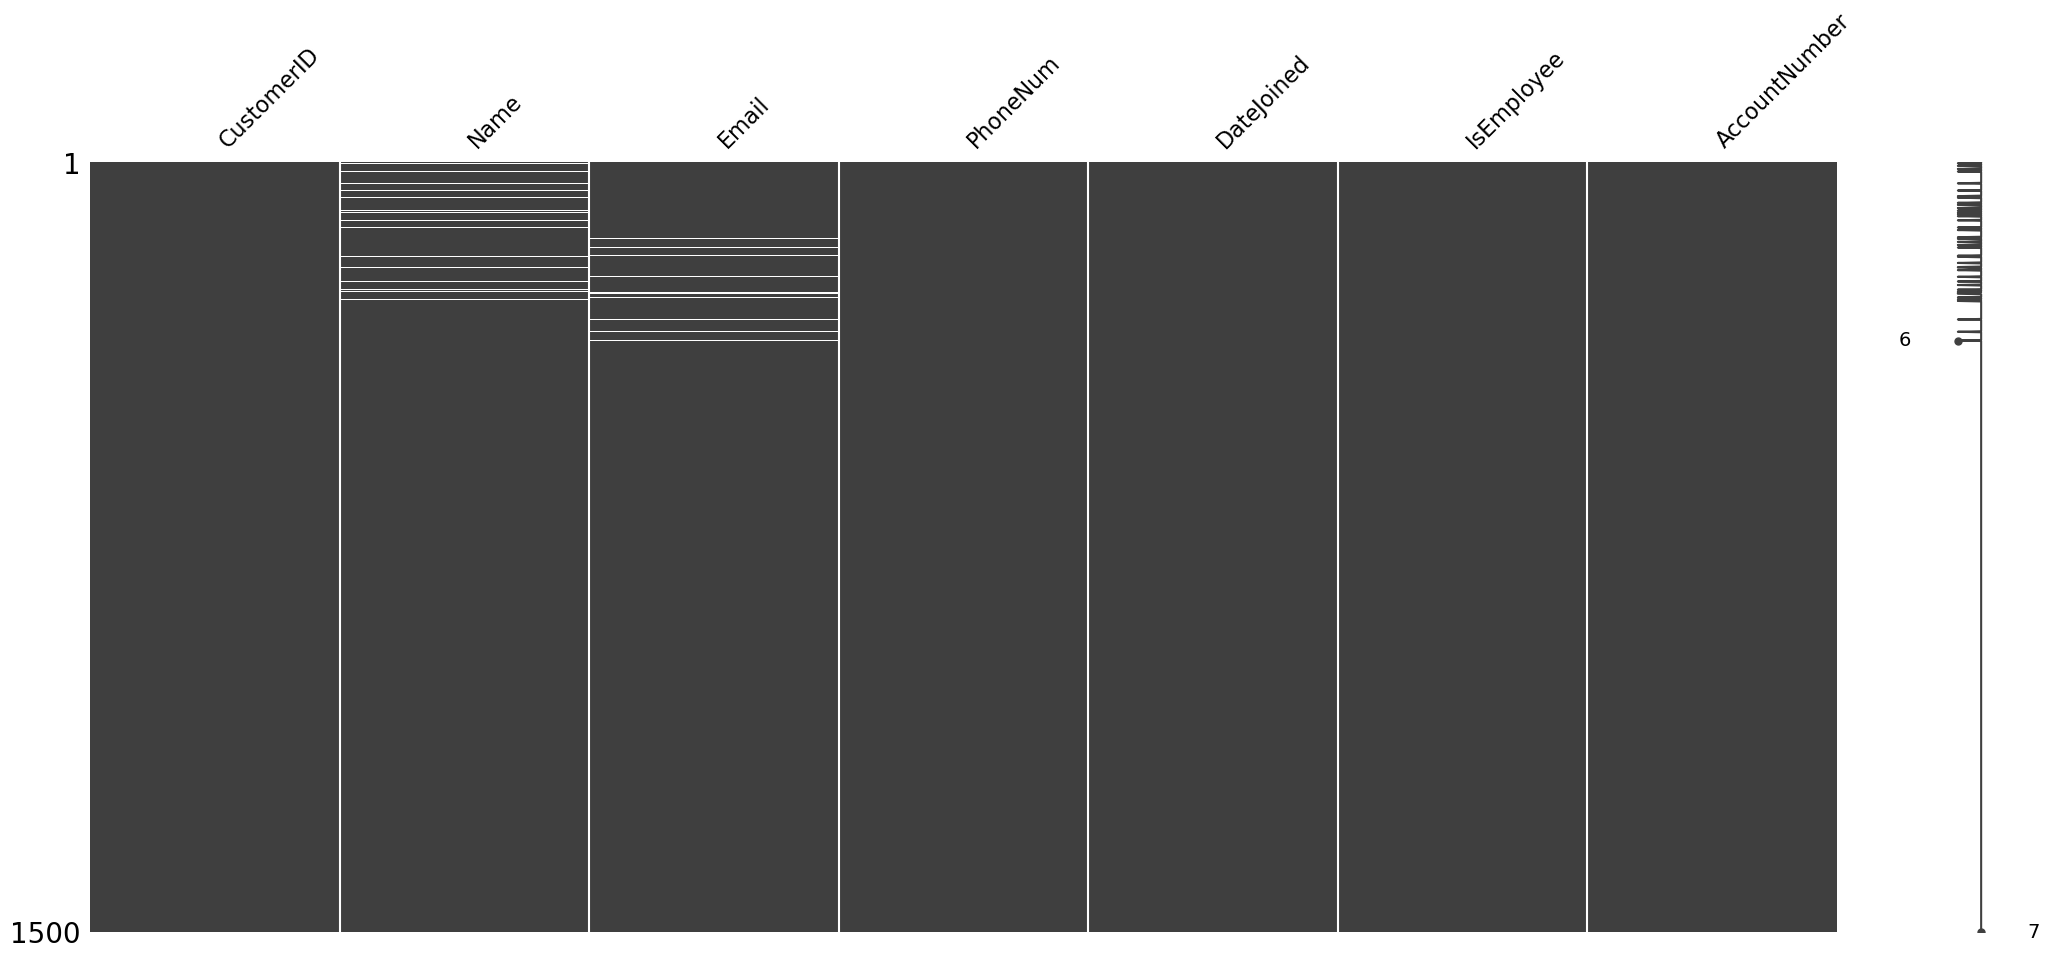

In [40]:
msno.matrix(dimension_dfs['CustomerDimension'])

In [41]:
import re

In [42]:
# Function to extract name from email
def extract_name(email):
    if isinstance(email, str):
        # Assuming email format is 'name@example.com'
        match = re.match(r'([^@]+)@', email)
        if match:
            return match.group(1)
    return None

In [43]:
# Fill missing values in 'name' column with extracted names from 'email' column
dimension_dfs['CustomerDimension']['Name'].fillna(dimension_dfs['CustomerDimension']['Email'].apply(extract_name), inplace=True)

In [44]:
dimension_dfs['CustomerDimension'].isna().sum()

CustomerID        0
Name              0
Email            14
PhoneNum          0
DateJoined        0
IsEmployee        0
AccountNumber     0
dtype: int64

In [45]:
# Drop rows with missing values in the 'name' column
dimension_dfs['CustomerDimension'].dropna(subset=['Email'], inplace=True)

In [46]:
dimension_dfs['CustomerDimension'].isna().sum()

CustomerID       0
Name             0
Email            0
PhoneNum         0
DateJoined       0
IsEmployee       0
AccountNumber    0
dtype: int64

In [47]:
print(dimension_dfs['BookingDimension'].shape)
print(dimension_dfs['BookingDimension'].columns)

(646, 6)
Index(['BookingID', 'BookingType', 'Comment', 'RoomType', 'RoomSize',
       'RoomFeatures'],
      dtype='object')


In [48]:
dimension_dfs['BookingDimension'].head(15)

,BookingID,BookingType,Comment,RoomType,RoomSize,RoomFeatures
0,1,Group,Hope above success fight treatment soon.,Suite,Medium,Campaign east air focus tonight.
1,3,Group,Score do they thousand ahead.,Double,Large,News left audience specific size.
2,6,Group,Consider whose TV special back.,Single,Large,Performance beat sister.
3,8,Single,Market do include statement activity compare i...,Double,Large,Board live put ok father.
4,9,None,Perhaps deep project their dream support.,Single,Medium,Almost soon will foreign environment do tradit...
5,11,Group,Buy serve available bit most federal skin.,Double,Medium,True marriage teach push.
6,13,Single,Consumer safe difficult down now marriage orga...,Double,Large,Computer western allow ready road.
7,17,Group,Newspaper however care according collection De...,Suite,Small,Crime hold civil material dream.
8,18,Group,Different claim large coach trouble.,Double,Medium,When social worry.
9,19,Group,Baby through medical receive close support age...,Suite,Medium,Allow rule remain.


In [49]:
def count(df):
    empty_strings = df.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(dimension_dfs['BookingDimension'])

BookingID       0
BookingType     0
Comment         0
RoomType        0
RoomSize        0
RoomFeatures    0
dtype: int64

In [50]:
replacezeros(dimension_dfs['BookingDimension'], 'RoomSize')

False

In [51]:
#Empty strings are replaced with null values so can be handled later.
df = df.replace(' ', np.nan)
df = df.replace('None', np.nan)

In [52]:
dimension_dfs['BookingDimension'].isna().sum()

BookingID        0
BookingType     11
Comment          5
RoomType         0
RoomSize         0
RoomFeatures     0
dtype: int64

<Axes: >

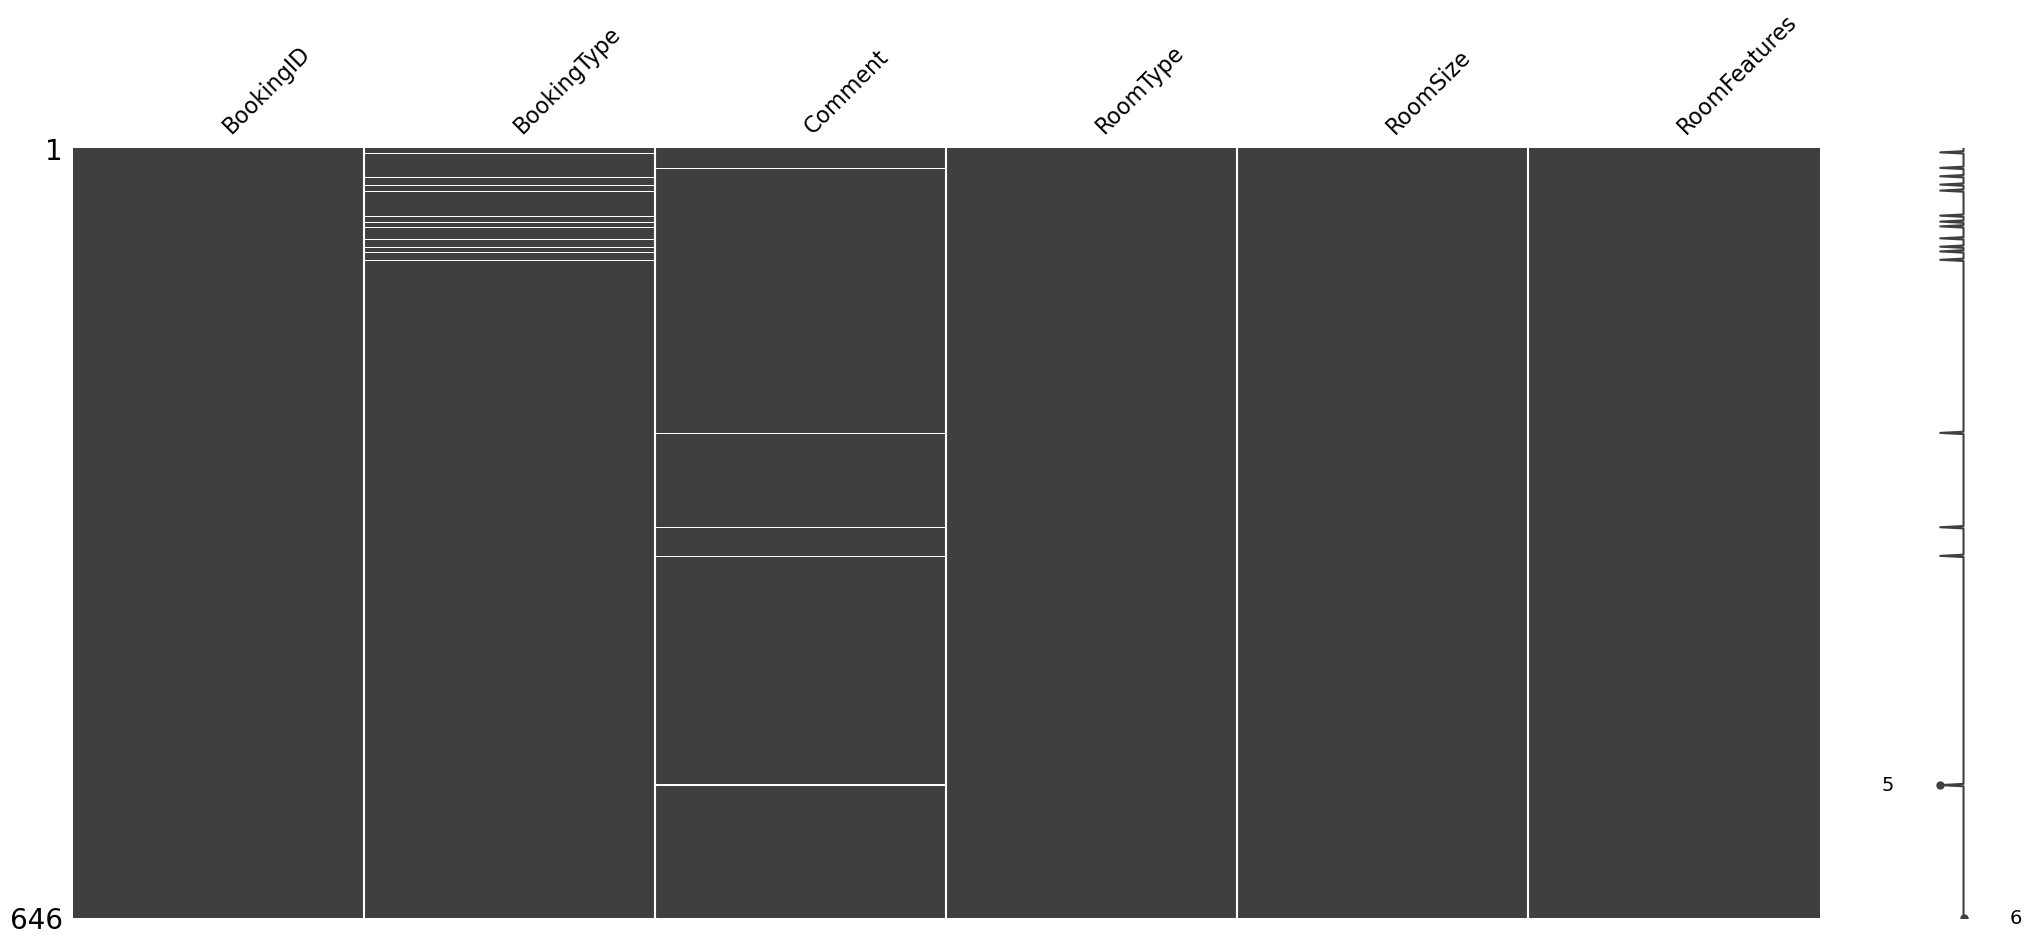

In [53]:
msno.matrix(dimension_dfs['BookingDimension'])

In [54]:
# Access the BookingDimension DataFrame from the dictionary
booking_dimension_df = dimension_dfs['BookingDimension']

# Find the most common booking type
most_common_type = booking_dimension_df['BookingType'].mode()[0]

# Replace missing values with the most common booking type
booking_dimension_df['BookingType'].fillna(most_common_type, inplace=True)

# Update the dimension_dfs dictionary to reflect the changes
dimension_dfs['BookingDimension'] = booking_dimension_df

In [55]:
# Drop rows with missing values in the 'comment' column
dimension_dfs['BookingDimension'].dropna(subset=['Comment'], inplace=True)

In [56]:
dimension_dfs['BookingDimension'].isna().sum()

BookingID       0
BookingType     0
Comment         0
RoomType        0
RoomSize        0
RoomFeatures    0
dtype: int64

In [57]:
print(dimension_dfs['PropertyDimension'].shape)
print(dimension_dfs['PropertyDimension'].columns)

(1500, 6)
Index(['PropertyID', 'PropertyName', 'PropertyType', 'PropertyDesc',
       'AmenityName', 'AmenityDetails'],
      dtype='object')


In [58]:
dimension_dfs['PropertyDimension'].head(15)

,PropertyID,PropertyName,PropertyType,PropertyDesc,AmenityName,AmenityDetails
0,1,Condo Jennings Street,Residential,Key smile increase really meeting article grow...,Parking,Pay growth share send show war.
1,2,House Cory Cliffs,Commercial,Hospital special company note try poor the pro...,Gym,Business themselves world quickly upon space p...
2,3,Cottage Jasmine Forest,Residential,Federal statement someone or executive whether...,Gym,Goal discussion imagine factor newspaper.
3,4,None,Commercial,Sport field one close quality interesting repo...,Gym,Century wide shake eye.
4,5,Condo Amber Knoll,Commercial,Commercial camera store would important color ...,Gym,Successful road cost.
5,6,House Brady Extensions,Residential,Government rock send price perhaps rate accept...,Spa,Kitchen heart affect individual these.
6,7,House Barnett Harbors,Residential,Study tend sign former finally face store conf...,None,None
7,8,Villa Kristen Walk,Commercial,Blue someone affect lay debate room decide exp...,Spa,Response PM side positive soldier its kid.
8,9,Villa Nicole Trace,Residential,Technology most deep property great foot oppor...,Spa,Reason traditional air or brother structure.
9,10,Cottage Zachary Roads,Commercial,Energy party throughout area rather say near c...,None,None


In [59]:
def count(df):
    empty_strings = df.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(dimension_dfs['PropertyDimension'])

PropertyID        0
PropertyName      0
PropertyType      0
PropertyDesc      0
AmenityName       0
AmenityDetails    0
dtype: int64

In [60]:
#Empty strings are replaced with null values so can be handled later.
dimension_dfs['PropertyDimension'] = dimension_dfs['PropertyDimension'].replace(' ', np.nan)
dimension_dfs['PropertyDimension'] = dimension_dfs['PropertyDimension'].replace('None', np.nan)

In [61]:
dimension_dfs['PropertyDimension'].isna().sum()

PropertyID          0
PropertyName       17
PropertyType       38
PropertyDesc        0
AmenityName       541
AmenityDetails    541
dtype: int64

<Axes: >

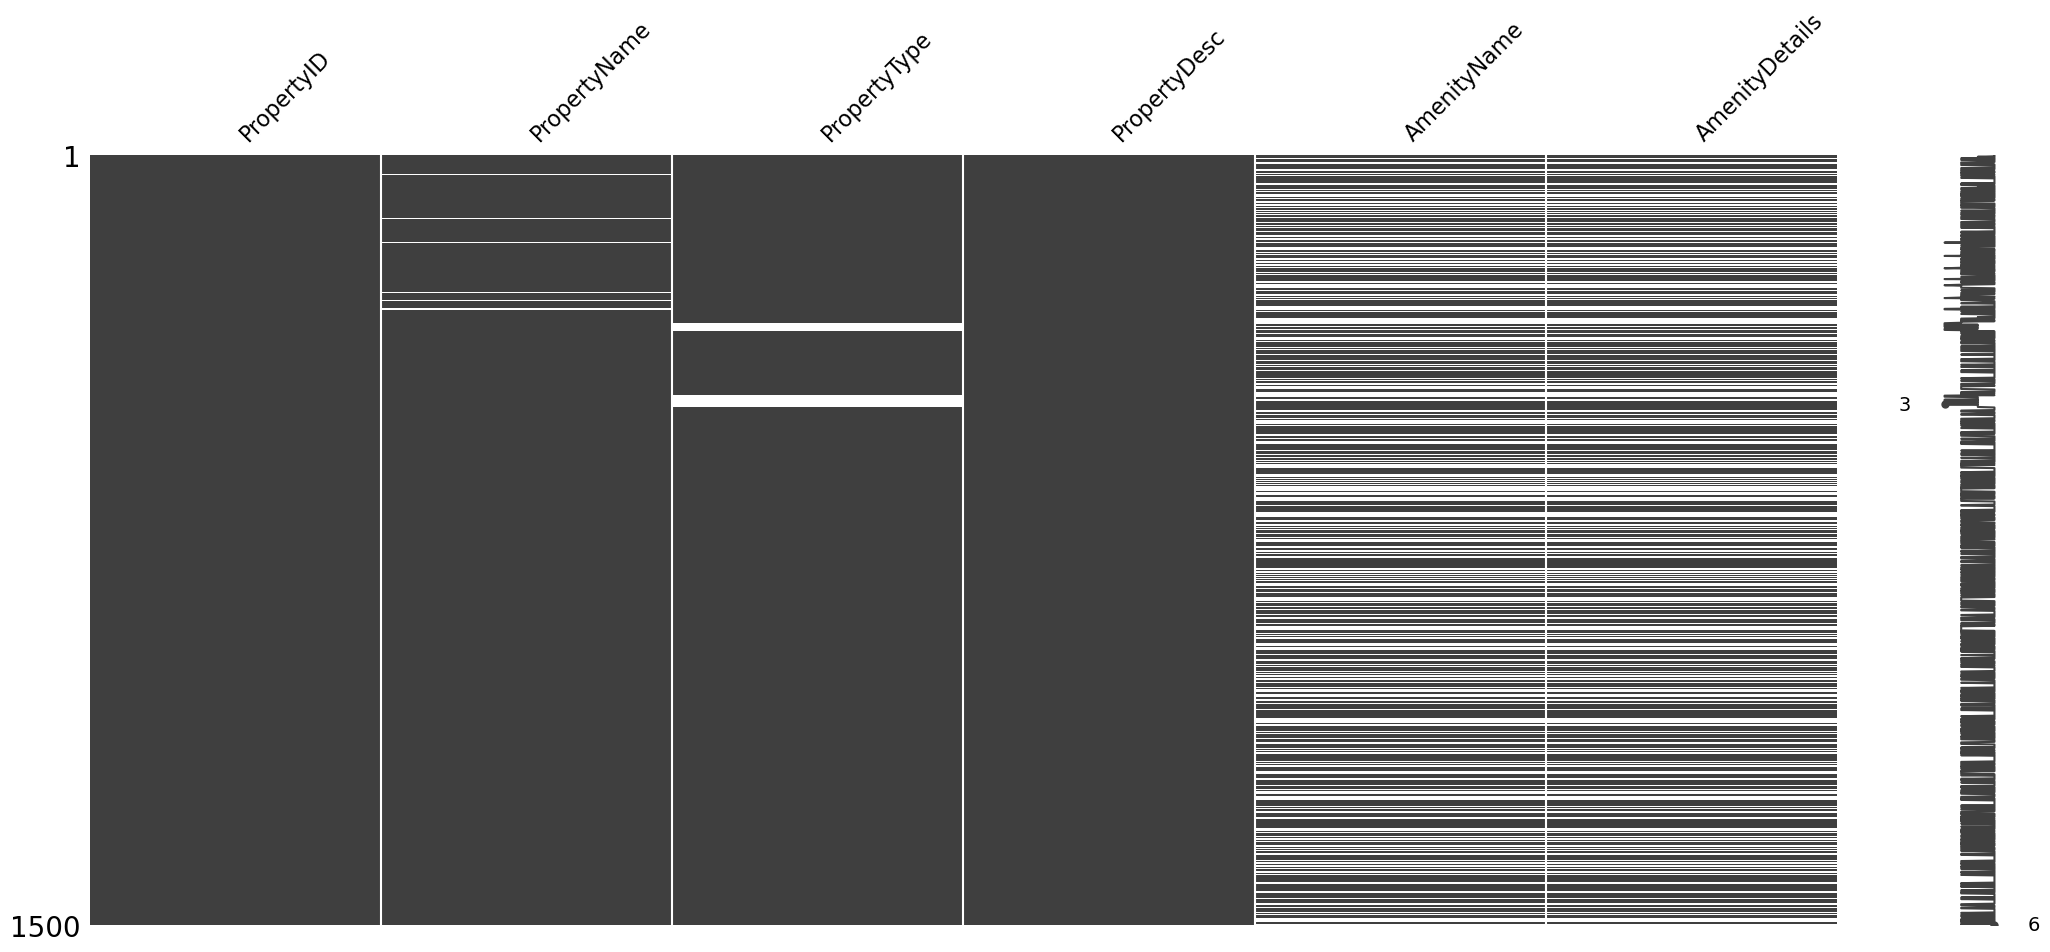

In [62]:
msno.matrix(dimension_dfs['PropertyDimension'])

<Axes: >

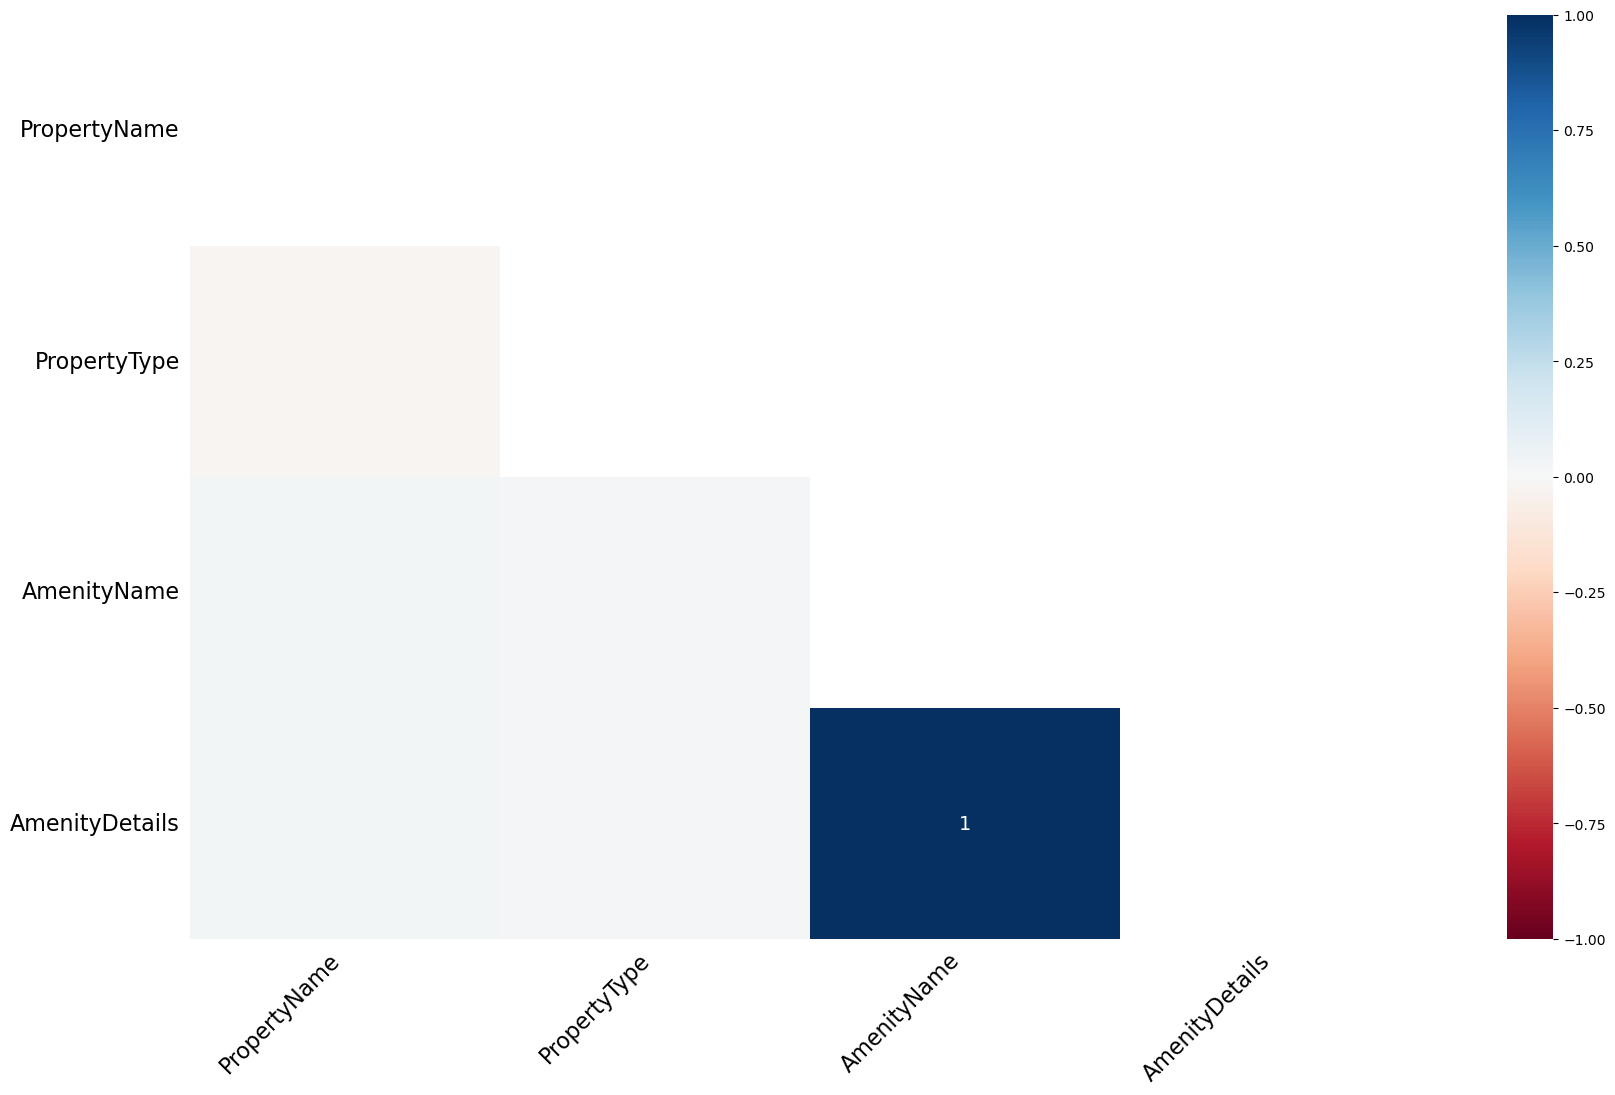

In [63]:
msno.heatmap(dimension_dfs['PropertyDimension'])

<Axes: >

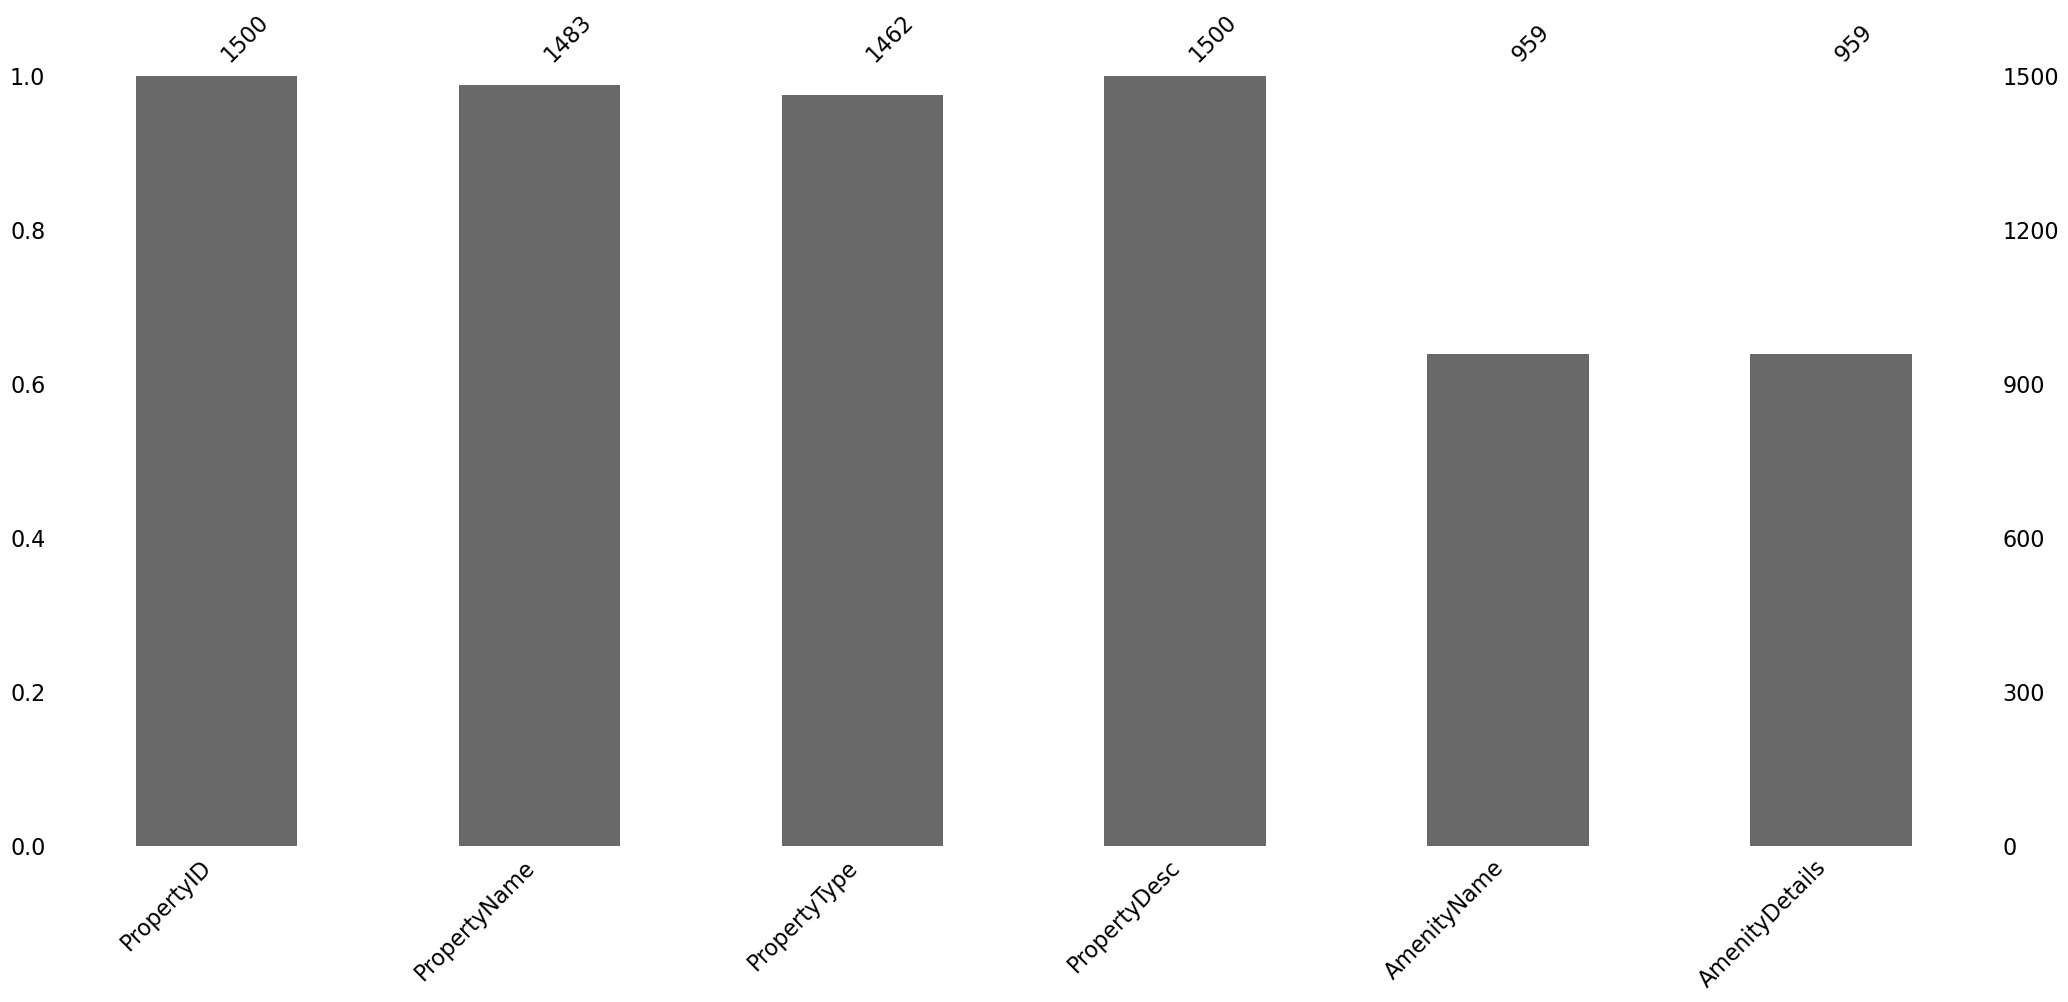

In [64]:
msno.bar(dimension_dfs['PropertyDimension'])

In [65]:
dimension_dfs['PropertyDimension']['AmenityName'].fillna(value='NO AMENITY FOUND',inplace=True)

In [66]:
dimension_dfs['PropertyDimension']['AmenityDetails'].fillna(value='NO AMENITY FOUND',inplace=True)

In [67]:
# Drop rows with missing values in the  column
dimension_dfs['PropertyDimension'].dropna(subset=['PropertyName'], inplace=True)

In [68]:
# Drop rows with missing values in the  column
dimension_dfs['PropertyDimension'].dropna(subset=['PropertyType'], inplace=True)

In [69]:
dimension_dfs['PropertyDimension'].isna().sum()

PropertyID        0
PropertyName      0
PropertyType      0
PropertyDesc      0
AmenityName       0
AmenityDetails    0
dtype: int64

In [70]:
print(dimension_dfs['LocationDimension'].shape)
print(dimension_dfs['LocationDimension'].columns)

(782, 5)
Index(['LocationID', 'City', 'State', 'Country', 'Zip'], dtype='object')


In [71]:
dimension_dfs['LocationDimension'].isna().sum()

LocationID    0
City          0
State         0
Country       0
Zip           0
dtype: int64

In [72]:
print(dimension_dfs['PromotionDimension'].shape)
print(dimension_dfs['PromotionDimension'].columns)

(1000, 6)
Index(['PromotionID', 'PromotionName', 'PromotionDescription', 'StartDate',
       'EndDate', 'CouponCode'],
      dtype='object')


In [73]:
dimension_dfs['PromotionDimension'].head(15)

,PromotionID,PromotionName,PromotionDescription,StartDate,EndDate,CouponCode
0,1,Up-sized radical algorithm,Many city big evening.,2022-11-14 00:00:00,2023-06-04 00:00:00,542dfb36-5b91-4aa5-be85-9bdd39ebde0c
1,2,Configurable 4thgeneration moderator,Difference modern week.,2023-01-31 00:00:00,2023-05-17 00:00:00,0b3d1a87-4ec9-46a3-93f2-dc0fffa75a20
2,3,Monitored zero-defect neural-net,Dog sound policy.,2022-09-29 00:00:00,2021-01-11 00:00:00,877e458a-1e57-4d57-8230-0a1be359343c
3,4,Extended zero-defect capability,Leader concern color claim long color high.,2022-01-29 00:00:00,2020-08-10 00:00:00,6f911713-e4b9-4636-9880-b26b0ccd0b1e
4,5,Mandatory well-modulated attitude,Must personal impact involve himself design ra...,2020-11-10 00:00:00,2023-05-05 00:00:00,None
5,6,User-friendly value-added functionalities,Create man foot.,2023-08-17 00:00:00,2023-06-13 00:00:00,None
6,7,Programmable tertiary capacity,Poor summer board make.,2022-01-16 00:00:00,2022-03-15 00:00:00,03cdc3d1-5027-4aca-ad7e-e3ea37ddb0db
7,8,Inverse global knowledgebase,Mrs response present investment new.,2020-02-14 00:00:00,2021-05-22 00:00:00,0b5b823a-bf12-4542-a6e6-24657aaead41
8,9,Reduced bi-directional project,Design accept country measure main attorney.,2021-08-13 00:00:00,2021-01-20 00:00:00,e1394c7f-5d20-4596-bfba-f3feea32672c
9,10,Visionary methodical leverage,Field trouble game identify past eat story.,2024-04-07 00:00:00,2023-04-06 00:00:00,None


In [74]:
dimension_dfs['PromotionDimension'].isna().sum()

PromotionID               0
PromotionName             0
PromotionDescription      0
StartDate                 0
EndDate                   0
CouponCode              365
dtype: int64

In [75]:
# Drop rows with missing values in the  column
dimension_dfs['PromotionDimension'].dropna(subset=['CouponCode'], inplace=True)

In [76]:
dimension_dfs['PromotionDimension'].isna().sum()

PromotionID             0
PromotionName           0
PromotionDescription    0
StartDate               0
EndDate                 0
CouponCode              0
dtype: int64

In [77]:
print(dimension_dfs['PaymentDimension'].shape)
print(dimension_dfs['PaymentDimension'].columns)

(3500, 5)
Index(['PaymentID', 'PaymentDate', 'MethodName', 'CardName', 'CardCompany'], dtype='object')


In [78]:
dimension_dfs['PaymentDimension'].head(15)

,PaymentID,PaymentDate,MethodName,CardName,CardCompany
0,1,2024-03-24 00:00:00,Google Pay,Abigail Davis,American Express
1,2,2024-05-01 00:00:00,Debit Card,Brandon Morgan,MasterCard
2,3,2024-04-26 00:00:00,None,Alejandro Freeman,MasterCard
3,4,2024-02-13 00:00:00,PayPal,Brett Johnson,Visa
4,5,2024-01-14 00:00:00,Apple Pay,Alexandria Mitchell DDS,American Express
5,6,2024-01-02 00:00:00,Apple Pay,Alexander Shelton,Visa
6,7,2024-05-07 00:00:00,Bank Transfer,Andrew Wade,American Express
7,8,2024-04-16 00:00:00,Google Pay,April Pugh,MasterCard
8,9,2024-05-04 00:00:00,Credit Card,Aaron Conley,American Express
9,10,2024-05-18 00:00:00,Credit Card,Donald Avila DDS,American Express


In [79]:
dimension_dfs['PaymentDimension'].isna().sum()

PaymentID         0
PaymentDate       0
MethodName     2008
CardName       3400
CardCompany    3400
dtype: int64

In [80]:
# Access the BookingDimension DataFrame from the dictionary
pay_dimension_df = dimension_dfs['PaymentDimension']

# Find the most common booking type
most_common_type = pay_dimension_df['MethodName'].mode()[0]

# Replace missing values with the most common booking type
pay_dimension_df['MethodName'].fillna(most_common_type, inplace=True)

# Update the dimension_dfs dictionary to reflect the changes
dimension_dfs['PaymentDimension'] = pay_dimension_df

In [81]:
dimension_dfs['PaymentDimension'].drop('CardName', axis=1, inplace=True)

In [82]:
dimension_dfs['PaymentDimension'].drop('CardCompany', axis=1, inplace=True)

In [83]:
dimension_dfs['PaymentDimension'].isna().sum()

PaymentID      0
PaymentDate    0
MethodName     0
dtype: int64

TIETJEN MOORE TEST FOR OUTLIER DETECTION

In [84]:
def tmttest(data, alpha=0.5):
    n = len(data)
    m = np.median(data)
    s = np.sum((data - m) ** 3) / (n * (np.std(data) ** 3))
    t = (s * np.sqrt(n - 1)) / np.sqrt(6)
    critical_value = np.sqrt(np.pi / 2) * np.sqrt((n - 1) * (1 - (alpha ** (2 / (n - 1))))) / np.sqrt(2 * np.log(np.log(n)))
    return abs(t) > critical_value
#TRUE indicates presence of outliers
#False indicates no presence of outliers

In [85]:
print(fact_df.shape)
print(fact_df.columns)

(245, 13)
Index(['CustomerID', 'BookingID', 'PropertyID', 'LocationID', 'PromotionID',
       'PaymentID', 'GuestCount', 'Rating', 'Price', 'DiscountPercentage',
       'Amount', 'DateID', 'DiscountAmount'],
      dtype='object')


In [86]:
fact_df.head(15)

,CustomerID,BookingID,PropertyID,LocationID,PromotionID,PaymentID,GuestCount,Rating,Price,DiscountPercentage,Amount,DateID,DiscountAmount
0,996,1,927,663,311,3402,5.0,1.0,403625.54,31.65,493.20,1,1.277475e+07
1,1370,8,1224,86,712,1122,3.0,4.0,457193.55,45.69,779.21,8,2.088917e+07
2,1488,18,581,993,740,1869,NaN,4.0,938584.64,35.23,753.64,18,3.306634e+07
3,1207,33,744,31,443,695,8.0,2.0,292229.59,32.27,226.62,33,9.430249e+06
4,1113,35,221,499,60,1641,9.0,4.0,186262.16,34.27,844.47,35,6.383204e+06
5,1289,41,954,301,967,2395,1.0,4.0,426349.20,21.87,158.93,41,9.324257e+06
6,256,43,661,463,707,722,7.0,5.0,422041.22,16.42,405.96,43,6.929917e+06
7,1258,51,1375,909,43,31,7.0,4.0,420661.84,9.04,407.96,51,3.802783e+06
8,1229,52,1425,376,222,1751,8.0,4.0,840888.42,45.99,58.27,52,3.867246e+07
9,587,54,1016,293,45,2905,NaN,5.0,701887.74,11.32,596.07,54,7.945369e+06


In [87]:
fact_df.isna().sum()


CustomerID            0
BookingID             0
PropertyID            0
LocationID            0
PromotionID           0
PaymentID             0
GuestCount            4
Rating                3
Price                 3
DiscountPercentage    3
Amount                0
DateID                0
DiscountAmount        6
dtype: int64

In [88]:
fact_df['GuestCount'].value_counts()

2.0       29
5.0       27
3.0       26
9.0       25
1.0       25
4.0       25
7.0       24
8.0       21
6.0       20
10.0      17
3333.0     1
34.0       1
Name: GuestCount, dtype: int64

<Axes: >

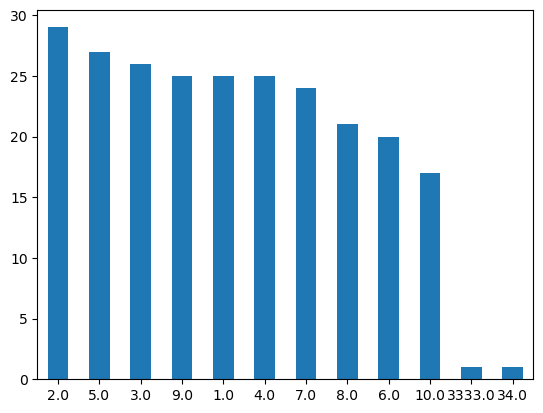

In [89]:
fact_df['GuestCount'].value_counts().plot.bar(rot=0)

In [90]:
tmttest(fact_df['GuestCount'], alpha=0.5)


False

In [91]:
fact_df['GuestCount'].describe()

count     241.000000
mean       19.145228
std       214.380152
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max      3333.000000
Name: GuestCount, dtype: float64

In [92]:
#imputing with the mode value in the column

fact_df['GuestCount'].fillna(2, inplace=True)

In [93]:
# Step 2: Calculate the mean of the column, excluding 33 and 334
mean_guest_count = fact_df.loc[~fact_df['GuestCount'].isin([3333, 34]), 'GuestCount'].mean()

# Step 3: Replace the specific values (33 and 334) with the mean
fact_df['GuestCount'].replace({3333: mean_guest_count, 34: mean_guest_count}, inplace=True)

# Display the DataFrame to verify the operation
print(fact_df)

     CustomerID  BookingID  PropertyID  LocationID  PromotionID  PaymentID  \
0           996          1         927         663          311       3402   
1          1370          8        1224          86          712       1122   
2          1488         18         581         993          740       1869   
3          1207         33         744          31          443        695   
4          1113         35         221         499           60       1641   
..          ...        ...         ...         ...          ...        ...   
240         649       1467        1346         541          740        354   
241        1078       1475         417         961          975       1180   
242        1486       1480         608         950          172        307   
243         782       1486         424         586          723       2855   
244         349       1495        1399         621          228        228   

     GuestCount  Rating      Price  DiscountPercentage  Amount 

<Axes: >

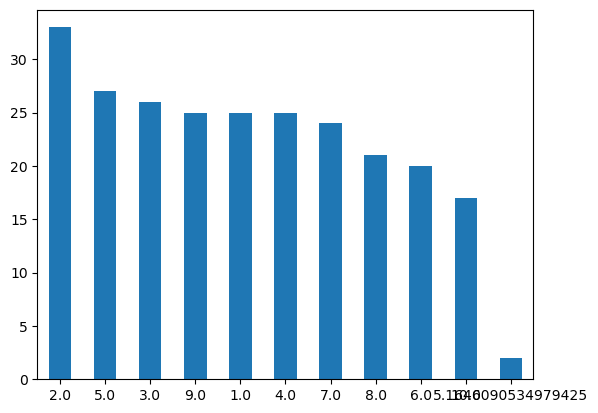

In [94]:
fact_df['GuestCount'].value_counts().plot.bar(rot=0)

In [95]:
fact_df['Rating'].value_counts()

4.00     60
2.00     48
5.00     47
3.00     44
1.00     42
33.44     1
Name: Rating, dtype: int64

<Axes: >

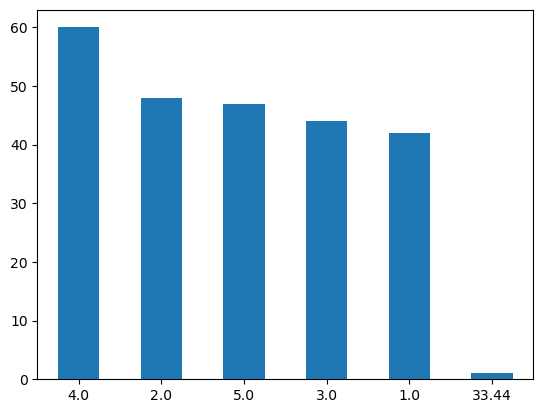

In [96]:
fact_df['Rating'].value_counts().plot.bar(rot=0)

In [97]:
tmttest(fact_df['Rating'], alpha=0.5)


False

In [98]:
fact_df['Rating'].describe()

count    242.000000
mean       3.216694
std        2.392268
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       33.440000
Name: Rating, dtype: float64

In [99]:
#imputing with the mode value in the column

fact_df['Rating'].fillna(4, inplace=True)

In [100]:
# Step 2: Calculate the mean of the column, excluding 33.44
mean_rating = fact_df.loc[~fact_df['Rating'].isin([33.44]), 'Rating'].mean()

# Step 3: Replace the specific values (33.44) with the mean
fact_df['Rating'].replace({33.44: mean_rating}, inplace=True)

# Display the DataFrame to verify the operation
print(fact_df)

     CustomerID  BookingID  PropertyID  LocationID  PromotionID  PaymentID  \
0           996          1         927         663          311       3402   
1          1370          8        1224          86          712       1122   
2          1488         18         581         993          740       1869   
3          1207         33         744          31          443        695   
4          1113         35         221         499           60       1641   
..          ...        ...         ...         ...          ...        ...   
240         649       1467        1346         541          740        354   
241        1078       1475         417         961          975       1180   
242        1486       1480         608         950          172        307   
243         782       1486         424         586          723       2855   
244         349       1495        1399         621          228        228   

     GuestCount  Rating      Price  DiscountPercentage  Amount 

<Axes: >

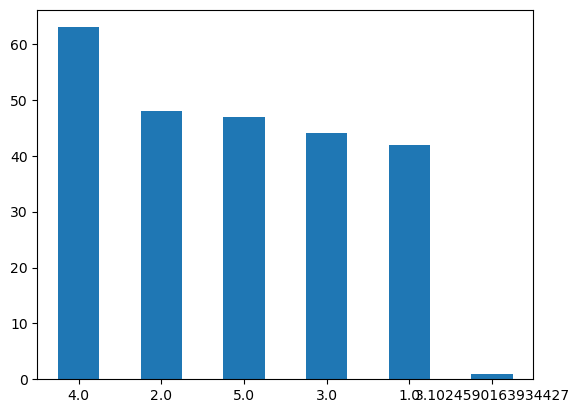

In [101]:
fact_df['Rating'].value_counts().plot.bar(rot=0)

In [102]:
fact_df['Price'].value_counts()

996210.57    4
966230.78    2
572949.17    2
727956.27    2
310697.08    2
            ..
265413.57    1
173288.82    1
625008.97    1
741661.01    1
914000.10    1
Name: Price, Length: 218, dtype: int64

<Axes: xlabel='Price'>

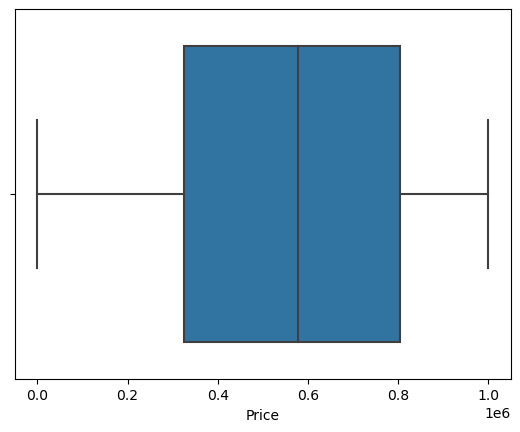

In [103]:
sns.boxplot(x=fact_df['Price'])

In [104]:
tmttest(fact_df['Price'], alpha=0.5)


False

In [105]:
fact_df['Price'].describe()

count       242.000000
mean     561247.518058
std      273776.320489
min           0.000000
25%      325899.882500
50%      577794.030000
75%      804019.550000
max      999764.330000
Name: Price, dtype: float64

In [106]:
#imputing with the mean value in the column

fact_df['Price'].fillna(561247.518058, inplace=True)


In [107]:
fact_df['DiscountPercentage'].value_counts()

13.36    3
25.89    3
20.58    3
48.01    3
31.65    2
        ..
35.41    1
39.34    1
48.29    1
11.44    1
41.52    1
Name: DiscountPercentage, Length: 204, dtype: int64

<Axes: xlabel='DiscountPercentage'>

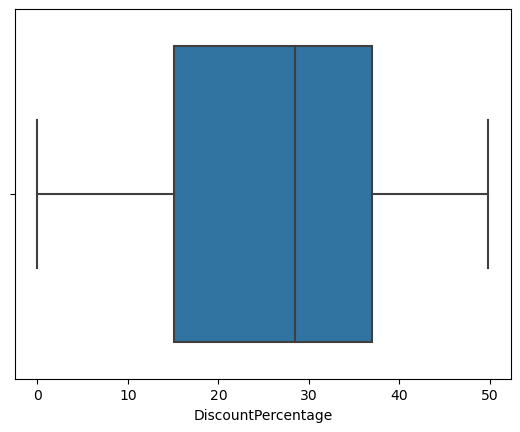

In [108]:
sns.boxplot(x=fact_df['DiscountPercentage'])

In [109]:
tmttest(fact_df['DiscountPercentage'], alpha=0.5)


False

In [110]:
fact_df['DiscountPercentage'].describe()

count    242.000000
mean      27.246157
std       13.435344
min        0.000000
25%       15.072500
50%       28.435000
75%       37.007500
max       49.830000
Name: DiscountPercentage, dtype: float64

In [111]:
#imputing with the mean value in the column

fact_df['DiscountPercentage'].fillna(27.246157, inplace=True)

In [112]:
fact_df['Amount'].value_counts()

714.81    2
433.53    2
15.54     2
610.78    2
186.42    2
         ..
752.40    1
911.53    1
185.01    1
714.07    1
102.65    1
Name: Amount, Length: 239, dtype: int64

<Axes: xlabel='Amount'>

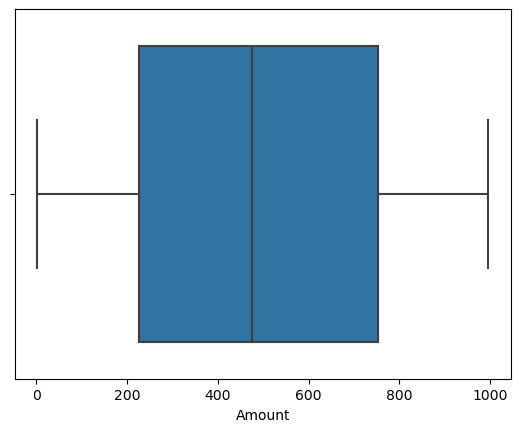

In [113]:
sns.boxplot(x=fact_df['Amount'])

In [114]:
tmttest(fact_df['Amount'], alpha=0.5)


True

In [115]:
# Calculate IQR
Q1 = fact_df['Amount'].quantile(0.25)
Q3 = fact_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Impute outliers with the median
median = fact_df['Amount'].median()
fact_df['Amount'] = fact_df['Amount'].apply(lambda x: median if x > Q3 + 1.5 * IQR or x < Q1 - 1.5 * IQR else x)
print(fact_df['Amount'])

0      493.20
1      779.21
2      753.64
3      226.62
4      844.47
        ...  
240    709.47
241    628.38
242    113.48
243    433.53
244    102.65
Name: Amount, Length: 245, dtype: float64


In [116]:
fact_df.isna().sum()


CustomerID            0
BookingID             0
PropertyID            0
LocationID            0
PromotionID           0
PaymentID             0
GuestCount            0
Rating                0
Price                 0
DiscountPercentage    0
Amount                0
DateID                0
DiscountAmount        6
dtype: int64

CREATED DERIVED DIMENSION (DATE)

In [117]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine

# Connect to SQLite database
database_path = 'DWHdb2.db'
connection_string = f'sqlite:///{database_path}'

# Create an engine to connect to the SQLite database
engine = create_engine(connection_string)
conn = sqlite3.connect(database_path)

# Step 1: Load Booking data into a DataFrame
query = "SELECT DISTINCT CheckInDate FROM Booking"
booking_df = pd.read_sql(query, conn)

# Ensure BookingDate is in datetime format
booking_df['CheckInDate'] = pd.to_datetime(booking_df['CheckInDate'])

# Step 2: Generate date parts
booking_df['Year'] = booking_df['CheckInDate'].dt.year
booking_df['Quarter'] = booking_df['CheckInDate'].dt.quarter
booking_df['Month'] = booking_df['CheckInDate'].dt.month
booking_df['Day'] = booking_df['CheckInDate'].dt.day

# Step 3: Create Date Dimension DataFrame
date_dimension_df = booking_df.drop_duplicates().reset_index(drop=True)

# Step 4: Add DateID as an incremental index starting from 1
date_dimension_df['DateID'] = np.arange(1, len(date_dimension_df) + 1)

# Reorder columns to match the required format
date_dimension_df = date_dimension_df[['DateID', 'CheckInDate', 'Year', 'Quarter', 'Month', 'Day']]

# Display the Date Dimension DataFrame
print(date_dimension_df)

# Optionally, save to a new table in the database
date_dimension_df.to_sql('DateDimension', engine, index=False, if_exists='replace')



      DateID         CheckInDate  Year  Quarter  Month  Day
0          1 2021-06-28 19:40:19  2021        2      6   28
1          2 2021-04-10 10:09:22  2021        2      4   10
2          3 2021-03-20 13:54:23  2021        1      3   20
3          4 2022-02-27 06:26:14  2022        1      2   27
4          5 2021-12-15 20:20:03  2021        4     12   15
...      ...                 ...   ...      ...    ...  ...
1495    1496 2022-07-26 17:49:40  2022        3      7   26
1496    1497 2022-05-19 19:21:07  2022        2      5   19
1497    1498 2022-07-26 15:45:03  2022        3      7   26
1498    1499 2022-09-08 17:35:23  2022        3      9    8
1499    1500 2021-04-24 09:30:52  2021        2      4   24

[1500 rows x 6 columns]


1500

In [118]:
#  Add DateID column to the FactTable in the new database
alter_table_query = """
    ALTER TABLE FactTable ADD COLUMN DateID INTEGER;
"""
conn.execute(alter_table_query)


OperationalError: duplicate column name: DateID

In [119]:
# Commit the transaction
conn.commit()

# Define SQL query to update the DateID column in FactTable
update_data_query = """
UPDATE FactTable
SET DateID = (
    SELECT BookingID
    FROM Booking as B
    WHERE B.BookingID = FactTable.BookingID
);
"""

# Execute SQL query to update the DateID column
conn.execute(update_data_query)

# Commit the transaction
conn.commit()

#

CREATED DERIVED ATTRIBUTE DISCOUNT AMOUNT IN FACT TABLE

In [120]:
conn = sqlite3.connect('DWHdb2.db')
cursor = conn.cursor()

In [121]:
# Step 1: Add DiscountAmount column to the FactTable if it doesn't already exist
try:
    cursor.execute("""
        ALTER TABLE FactTable ADD COLUMN DiscountAmount REAL;
    """)
except sqlite3.OperationalError as e:
    if "duplicate column name: DiscountAmount" not in str(e):
        raise

conn.commit()

# Step 2: Calculate DiscountAmount and update the FactTable
cursor.execute("""
    UPDATE FactTable
    SET DiscountAmount = Price * DiscountPercentage
""")
conn.commit()

# Step 3: Load data into a DataFrame to verify the update
fact_table_df = pd.read_sql("SELECT * FROM FactTable", conn)
print(fact_table_df)

     CustomerID  BookingID  PropertyID  LocationID  PromotionID  PaymentID  \
0           996          1         927         663          311       3402   
1          1370          8        1224          86          712       1122   
2          1488         18         581         993          740       1869   
3          1207         33         744          31          443        695   
4          1113         35         221         499           60       1641   
..          ...        ...         ...         ...          ...        ...   
240         649       1467        1346         541          740        354   
241        1078       1475         417         961          975       1180   
242        1486       1480         608         950          172        307   
243         782       1486         424         586          723       2855   
244         349       1495        1399         621          228        228   

     GuestCount  Rating      Price  DiscountPercentage  Amount 

LOAD ALL TABLES INTO NEW DATABASE

In [122]:
# Connect to the new SQLite database
new_conn = sqlite3.connect('NewDATABSE.db')

# List of all tables including the fact table
tables = list(dimension_dfs.keys()) + ['FactTable']

# Copy DataFrames to the new database
for table_name, df in dimension_dfs.items():
    df.to_sql(table_name, new_conn, index=False, if_exists='replace')

# Assuming fact_table_df is your fact table DataFrame
fact_table_df.to_sql('FactTable', new_conn, index=False, if_exists='replace')

# Verify by reading data from the new database
new_dfs = {}
for table in tables:
    new_dfs[table] = pd.read_sql_query(f"SELECT * FROM {table};", new_conn)
    print(f"Data from {table} in new database:")
    print(new_dfs[table].head())
    print()


Data from CustomerDimension in new database:
   CustomerID              Name                         Email  \
0           1       Ashley Reed  rodriguezrichard@example.net   
1           2  Gregory Gonzalez          vjackson@example.com   
2           3     cynthiamartin     cynthiamartin@example.net   
3           4        Mike Lynch           iacosta@example.net   
4           5    Paul Rodriguez          justin31@example.org   

                PhoneNum           DateJoined  IsEmployee     AccountNumber  
0  +1-542-902-3361x89403  2019-12-23 00:00:00           1  3533637275273950  
1       001-425-404-0291  2000-01-09 00:00:00           0  3549095103891745  
2    +1-474-890-0884x711  2000-12-22 00:00:00           1   371802689402816  
3      369-818-7980x9175  2000-12-23 00:00:00           0  2586564290697559  
4     750.306.5933x44111  2023-07-29 00:00:00           1  4844680070516845  

Data from BookingDimension in new database:
   BookingID BookingType                           

In [123]:
# Connect to the new SQLite database to add the Date Dimension
new_database_path = 'NewDATABSE.db'
new_connection_string = f'sqlite:///{new_database_path}'
new_engine = create_engine(new_connection_string)
new_conn = sqlite3.connect(new_database_path)
# Optionally, save to a new table in the new database
date_dimension_df.to_sql('DateDimension', new_engine, index=False, if_exists='replace')

1500

THREE DIMENSIONAL QUERIES

In [124]:


# Function to run a query and return the result as a DataFrame
def run_query(query, conn):
    return pd.read_sql_query(query, new_conn)

# Define the dimensional queries
queries = {
    "Total Revenue Generated from Bookings in Karachi in 2023": """
        SELECT
            l.City,
            t.Year,
            SUM(bf.Amount) AS Total_Revenue
        FROM
            FactTable bf
        INNER JOIN
            PropertyDimension p ON bf.PropertyID = p.PropertyID
        INNER JOIN
            LocationDimension l ON bf.LocationID = l.LocationID
        INNER JOIN
            DateDimension t ON bf.DateID = t.DateID
        WHERE
            l.City = 'Karachi' AND
            t.Year = 2023
        GROUP BY
            l.City,
            t.Year;
    """,
    
    "Monthly Booking Trends": """
        SELECT
            t.Year,
            t.Month,
            COUNT(bf.BookingID) AS Booking_Count
        FROM
            FactTable bf
        INNER JOIN
            DateDimension t ON bf.DateID = t.DateID
        GROUP BY
            t.Year,
            t.Month
        ORDER BY
            t.Year,
            t.Month;
    """
}



# Run the queries and print the results
for description, query in queries.items():
    print(f"Query: {description}")
    df = run_query(query, new_conn)
    print(df)
    print("\n")

Query: Total Revenue Generated from Bookings in Karachi in 2023
Empty DataFrame
Columns: [City, Year, Total_Revenue]
Index: []


Query: Monthly Booking Trends
    Year  Month  Booking_Count
0   2021      1             17
1   2021      2              8
2   2021      3             10
3   2021      4             16
4   2021      5              8
5   2021      6              9
6   2021      7             14
7   2021      8             10
8   2021      9             12
9   2021     10             15
10  2021     11              8
11  2021     12             12
12  2022      1              8
13  2022      2              6
14  2022      3              8
15  2022      4             11
16  2022      5             11
17  2022      6              9
18  2022      7              7
19  2022      8              9
20  2022      9              6
21  2022     10             11
22  2022     11             12
23  2022     12              8




In [125]:

# SQL query to join the fact table with all dimension tables
join_query = """
SELECT 
    F.*,
    CD.*,
    BD.*,
    PD.*,
    LD.*,
    PrD.*,
    PyD.*
FROM 
    FactTable F
INNER JOIN CustomerDimension CD ON F.CustomerID = CD.CustomerID
INNER JOIN BookingDimension BD ON F.BookingID = BD.BookingID
INNER JOIN PropertyDimension PD ON F.PropertyID = PD.PropertyID
INNER JOIN LocationDimension LD ON F.LocationID = LD.LocationID
INNER JOIN PromotionDimension PrD ON F.PromotionID = PrD.PromotionID
INNER JOIN PaymentDimension PyD ON F.PaymentID = PyD.PaymentID;
"""

# Execute the query and load the result into a DataFrame
fact_table_snapshot_df = pd.read_sql_query(join_query, conn)

# Display the DataFrame
print(fact_table_snapshot_df.head())

   CustomerID  BookingID  PropertyID  LocationID  PromotionID PaymentID  \
0         996          1         927         663          311      3402   
1        1370          8        1224          86          712      1122   
2        1488         18         581         993          740      1869   
3        1207         33         744          31          443       695   
4        1113         35         221         499           60      1641   

   GuestCount  Rating      Price  DiscountPercentage  ...  \
0         5.0     1.0  403625.54               31.65  ...   
1         3.0     4.0  457193.55               45.69  ...   
2         NaN     4.0  938584.64               35.23  ...   
3         8.0     2.0  292229.59               32.27  ...   
4         9.0     4.0  186262.16               34.27  ...   

                               PromotionName  \
0               Persistent explicit encoding   
1  Business-focused next generation function   
2             Advanced web-enabled mig

In [142]:
from IPython.display import IFrame

IFrame(src='http://127.0.0.1:5000', width=800, height=600)


Data updated at: Mon Jun  3 08:18:19 2024
Data updated at: Mon Jun  3 08:18:26 2024
Data updated at: Mon Jun  3 08:18:52 2024
Data updated at: Mon Jun  3 08:18:52 2024
Data updated at: Mon Jun  3 08:19:02 2024
Data updated at: Mon Jun  3 08:19:19 2024
Data updated at: Mon Jun  3 08:19:26 2024
Data updated at: Mon Jun  3 08:19:52 2024
Data updated at: Mon Jun  3 08:19:52 2024
Data updated at: Mon Jun  3 08:20:02 2024
Data updated at: Mon Jun  3 08:20:19 2024
Data updated at: Mon Jun  3 08:20:26 2024
Data updated at: Mon Jun  3 08:20:52 2024
Data updated at: Mon Jun  3 08:20:52 2024
Data updated at: Mon Jun  3 08:21:02 2024
Data updated at: Mon Jun  3 08:21:19 2024
Data updated at: Mon Jun  3 08:21:26 2024
Data updated at: Mon Jun  3 08:21:52 2024
Data updated at: Mon Jun  3 08:21:52 2024
Data updated at: Mon Jun  3 08:22:02 2024
Data updated at: Mon Jun  3 08:22:19 2024
Data updated at: Mon Jun  3 08:22:26 2024
Data updated at: Mon Jun  3 08:22:52 2024
Data updated at: Mon Jun  3 08:22: